# A. IMPORT LIBRARY:

In [2]:
# import libraries:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# B. IMPORT DATA:

In [3]:
# use .info() and .describe() to explore the dataset:
df = pd.read_excel('ecommerce retail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# C. CLEANSING:

# 1. Missing values:

In [5]:
# investigate missing value:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# drop missing value:
df = df.dropna()
df.shape

(406829, 8)

# 2. Data types:

In [8]:
# cleaning string and change data type:
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip() 
df['Description'] = df['Description'].replace(r"\s+",' ', regex = True) 
df['InvoiceNo'] = df['InvoiceNo'].astype('string')
df['CustomerID'] = df['CustomerID'].astype('string')
df.dtypes

InvoiceNo      string[python]
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

# 3a. Negative quantity:

In [9]:
# use .describe() to explore the dataset:
# Problem: min (Quantity) has the negative value
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406829.000000,406829,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-31 11:48:00,1.950000
75%,12.000000,2011-10-20 13:06:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.693370,NaN,69.315162


In [10]:
# solution 1: remove negative value in Quantity column:
df = df[df['Quantity']>0] 
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,397924.000000,397924,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174
min,1.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,180.420210,NaN,22.096788


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  string        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  string        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 27.3+ MB


# 3b. Remove 'canceled transactions':

In [12]:
# There are 2 ways to solve negative quantity: 
# The first one is to filter quantity >0 (as solution in step 3). The second one is 2 is to remove 'cancelled transactions' as below:
df = df[~df.InvoiceNo.str.contains('C')]
df.shape

(397924, 8)

# 4. Remove 'Unit Price = 0', since min of Unit Price equal 0:

In [13]:
# remove negative value in UnitPrice column:
df = df[df['UnitPrice']>0] 
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,397884.000000,397884,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488
min,1.000000,2010-12-01 08:26:00,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000
50%,6.000000,2011-07-31 14:39:00,1.950000
75%,12.000000,2011-10-20 14:33:00,3.750000
max,80995.000000,2011-12-09 12:50:00,8142.750000
std,179.331775,NaN,22.097877


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  string        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  string        
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3), string(2)
memory usage: 27.3+ MB


# 5. Remove duplicated data: 

In [15]:
# remove duplicate data in EXACT columns
df.drop_duplicates(inplace = True)
df.shape

(392692, 8)

# 6. Deal with Outlier data:
In this step, we need to deal with Outlier data. Outlier is a data point in the dataset that differs significantly from the other data or observations. Many statistic procedures are affected by the presence of outliers. So, in this case, removing the outlier may be an option.

In this method, we use IQR (Inter Quartile Range). IQR approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

In [16]:
# Finding the IQR of UnitPrice:
percentile25 = df['UnitPrice'].quantile(0.25)
percentile75 = df['UnitPrice'].quantile(0.75)
iqr = percentile75 - percentile25
# Finding upper and lower limit:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
# Removing Outlier from UnitPrice: 
new_df = df[(df['UnitPrice'] < upper_limit)  & (df['UnitPrice'] > lower_limit)]
print(df.shape)
print(new_df.shape)

(392692, 8)
(357996, 8)


# D. CALCULATION:

# 1. Create Sales column:

In [17]:
# Create new column, named 'Sales', to know the total value for each transaction:
new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']
new_df.head()

C:\Users\Nuong\AppData\Local\Temp\ipykernel_11240\2818019959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sales'] = new_df['Quantity'] * new_df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
# Take out the necessary columns for calculation:
RFM_1 = new_df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Sales']]
RFM_1

,CustomerID,InvoiceNo,InvoiceDate,Sales
0,17850.0,536365,2010-12-01 08:26:00,15.30
1,17850.0,536365,2010-12-01 08:26:00,20.34
2,17850.0,536365,2010-12-01 08:26:00,22.00
3,17850.0,536365,2010-12-01 08:26:00,20.34
4,17850.0,536365,2010-12-01 08:26:00,20.34
...,...,...,...,...
541904,12680.0,581587,2011-12-09 12:50:00,10.20
541905,12680.0,581587,2011-12-09 12:50:00,12.60
541906,12680.0,581587,2011-12-09 12:50:00,16.60
541907,12680.0,581587,2011-12-09 12:50:00,16.60


# 2. Calculate Recency - Frequency - Monetary:

In [19]:
# convert to appropriate data type:
NOW = datetime.datetime(2011,12,31)
NOW

datetime.datetime(2011, 12, 31, 0, 0)

In [21]:
# convert to appropriate data type:
RFM_1['InvoiceDate'] = RFM_1['InvoiceDate'].astype('datetime64[s]') 

In [23]:
# calculate InvoiceDate, InvoiceNo, Sales by each customer:
RFM_2 = RFM_1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                         'InvoiceNo': lambda x: len(x.unique()),
                                         'Sales': lambda x: x.sum()})
RFM_2
# hơi lăn tăn ý nghĩa dòng 2: len.unique = count unique.
# dòng 1 cực hay: ở kết hợp, cụ thể tính: diff = now - max(invoice date)
# nếu tách riêng ra từng bước ở đây, thì xem file ban đầu.

,InvoiceDate,InvoiceNo,Sales
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,7,3981.15
12348.0,96,4,1437.24
12349.0,39,1,1074.15
12350.0,331,1,294.40
...,...,...,...
18280.0,298,1,137.00
18281.0,201,1,46.92
18282.0,28,2,127.05


In [24]:
# using .reset_index(), to  return to the default index from 0 to n:
Cần dùng reset_index để trở về index mặc định là từ 0 đến n.
RFM_2 = RFM_1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                         'InvoiceNo': lambda x: len(x.unique()),
                                         'Sales': lambda x: x.sum()}).reset_index()
RFM_2

,CustomerID,InvoiceDate,InvoiceNo,Sales
0,12346.0,346,1,77183.60
1,12347.0,23,7,3981.15
2,12348.0,96,4,1437.24
3,12349.0,39,1,1074.15
4,12350.0,331,1,294.40
...,...,...,...,...
4301,18280.0,298,1,137.00
4302,18281.0,201,1,46.92
4303,18282.0,28,2,127.05
4304,18283.0,24,16,2002.63


In [25]:
# InvoiceDate đang ở dạng int64:  
RFM_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4306 entries, 0 to 4305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4306 non-null   string 
 1   InvoiceDate  4306 non-null   int64  
 2   InvoiceNo    4306 non-null   int64  
 3   Sales        4306 non-null   float64
dtypes: float64(1), int64(2), string(1)
memory usage: 134.7 KB


In [26]:
# using .rename() to rename current column:
RFM_2.rename(columns={'InvoiceDate': 'Recency', 
                      'InvoiceNo': 'Frequency',
                      'Sales': 'Monetary'}, inplace=True)
RFM_2

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12347.0,23,7,3981.15
2,12348.0,96,4,1437.24
3,12349.0,39,1,1074.15
4,12350.0,331,1,294.40
...,...,...,...,...
4301,18280.0,298,1,137.00
4302,18281.0,201,1,46.92
4303,18282.0,28,2,127.05
4304,18283.0,24,16,2002.63


# 4. Calculate R_SCORE, F_SCORE, M_SCORE: 

# CÁCH 1: TUY ĐƠN GIẢN, NHƯNG CHƯA HIỂU BẢN CHẤT:

In [30]:
# using .qcut(), to calculate r score, f score, and m score:
RFM_2['r_score'] = pd.qcut(RFM_2['Recency'].rank(method = 'first'), q=5, labels = range(5, 0, -1))
RFM_2['f_score'] = pd.qcut(RFM_2['Frequency'].rank(method = 'first'), q=5, labels = range(1,6)) # 2 cột có dupl ?
RFM_2['m_score'] = pd.qcut(RFM_2['Monetary'], q=5, labels = range(1,6))
RFM_2

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score
0,12346.0,346,1,77183.60,1,1,5
1,12347.0,23,7,3981.15,5,5,5
2,12348.0,96,4,1437.24,2,4,4
3,12349.0,39,1,1074.15,4,1,4
4,12350.0,331,1,294.40,1,1,2
...,...,...,...,...,...,...,...
4301,18280.0,298,1,137.00,1,2,1
4302,18281.0,201,1,46.92,1,2,1
4303,18282.0,28,2,127.05,5,3,1
4304,18283.0,24,16,2002.63,5,5,5


In [31]:
# calculate RFM Score:
RFM_2['RFM Score'] = RFM_2['r_score'].astype(str) + RFM_2['f_score'].astype(str) + RFM_2['m_score'].astype(str)
RFM_2['RFM Score'] = RFM_2['RFM Score'].astype(int)
RFM_2.head()

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,RFM Score
0,12346.0,346,1,77183.60,1,1,5,115
1,12347.0,23,7,3981.15,5,5,5,555
2,12348.0,96,4,1437.24,2,4,4,244
3,12349.0,39,1,1074.15,4,1,4,414
4,12350.0,331,1,294.40,1,1,2,112


# IMPORT SHEET 'SEGMENTATION':

In [32]:
# load dataframe of customer segmentation to each rfm_score:
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [33]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [34]:
# convert comma-separated string to a list of rfm scores:
seg['RFM Score'] = seg['RFM Score'].str.split(',')
print(seg['RFM Score'])

0             [555,  554,  544,  545,  454,  455,  445]
1       [543,  444,  435,  355,  354,  345,  344,  335]
2     [553,  551,  552,  541,  542,  533,  532,  531...
3             [512,  511,  422,  421,  412,  411,  311]
4     [525,  524,  523,  522,  521,  515,  514,  513...
5       [535,  534,  443,  434,  343,  334,  325,  324]
6       [331,  321,  312,  221,  213,  231,  241,  251]
7     [255,  254,  245,  244,  253,  252,  243,  242...
8         [155,  154,  144,  214, 215, 115,  114,  113]
9     [332,  322,  233,  232,  223,  222,  132,  123...
10                    [111,  112,  121,  131, 141, 151]
Name: RFM Score, dtype: object


In [35]:
# using .explode(), to create 'RFM Score' column:
seg = seg.explode('RFM Score').reset_index(drop=True) 
seg

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [36]:
# convert date type and sort 'RFM Score' column:
seg['RFM Score'] = seg['RFM Score'].astype(int)
seg.sort_values(by='RFM Score')
seg.head(10)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [37]:
seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    object
 1   RFM Score  125 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.6+ KB


# JOIN 2 TABLES:

In [47]:
joined = RFM_2.merge(seg, how='left', on='RFM Score')
joined

,CustomerID,Recency,Frequency,Monetary,r_score,f_score,m_score,RFM Score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,23,7,3981.15,5,5,5,555,Champions
2,12348.0,96,4,1437.24,2,4,4,244,At Risk
3,12349.0,39,1,1074.15,4,1,4,414,Promising
4,12350.0,331,1,294.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4301,18280.0,298,1,137.00,1,2,1,121,Lost customers
4302,18281.0,201,1,46.92,1,2,1,121,Lost customers
4303,18282.0,28,2,127.05,5,3,1,531,Potential Loyalist
4304,18283.0,24,16,2002.63,5,5,5,555,Champions


# PLOTS:

In [39]:
!pip install squarify

In [40]:
# need to install squarify first before importing:
import squarify

In [41]:
# group by customer segmentation, and calcualte metrics, including: CustCount, AvgFrequency, TolMonetary, AvgRecency:
joined_final = joined.groupby('Segment').agg({'CustomerID': 'count',
                                     'Frequency': 'mean',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
joined_final.columns = ['Segment', 'CustCount', 'AvgFrequency', 'TolMonetary', 'AvgRecency'] # Cách này ngắn gọn hơn thật, cần xem lại xxx
joined_final.sort_values(by='CustCount', ascending=False, inplace=True) # inplace là mới
joined_final

,Segment,CustCount,AvgFrequency,TolMonetary,AvgRecency
3,Champions,833,11.909964,4838731.510,31.869148
4,Hibernating customers,666,1.542042,222819.672,166.142643
5,Lost customers,495,1.092929,80528.260,296.373737
1,At Risk,435,3.650575,611339.291,165.586207
9,Potential Loyalist,422,2.483412,192704.480,46.841232
6,Loyal,419,5.231504,847759.520,56.642005
0,About To Sleep,292,1.250000,70726.190,105.636986
7,Need Attention,269,3.052045,422253.431,53.929368
8,New Customers,249,1.072289,45239.580,48.248996
10,Promising,134,1.283582,103404.880,46.059701


In [42]:
# calculate Count Share & Monetary Share:
joined_final['CountShare'] = joined_final['CustCount'] / joined_final['CustCount'].sum() 
joined_final['MonetaryShare'] = joined_final['TolMonetary'] / joined_final['TolMonetary'].sum()
joined_final

,Segment,CustCount,AvgFrequency,TolMonetary,AvgRecency,CountShare,MonetaryShare
3,Champions,833,11.909964,4838731.510,31.869148,0.193451,0.634218
4,Hibernating customers,666,1.542042,222819.672,166.142643,0.154668,0.029205
5,Lost customers,495,1.092929,80528.260,296.373737,0.114956,0.010555
1,At Risk,435,3.650575,611339.291,165.586207,0.101022,0.080129
9,Potential Loyalist,422,2.483412,192704.480,46.841232,0.098003,0.025258
6,Loyal,419,5.231504,847759.520,56.642005,0.097306,0.111117
0,About To Sleep,292,1.250000,70726.190,105.636986,0.067812,0.009270
7,Need Attention,269,3.052045,422253.431,53.929368,0.062471,0.055345
8,New Customers,249,1.072289,45239.580,48.248996,0.057826,0.005930
10,Promising,134,1.283582,103404.880,46.059701,0.031119,0.013553


### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

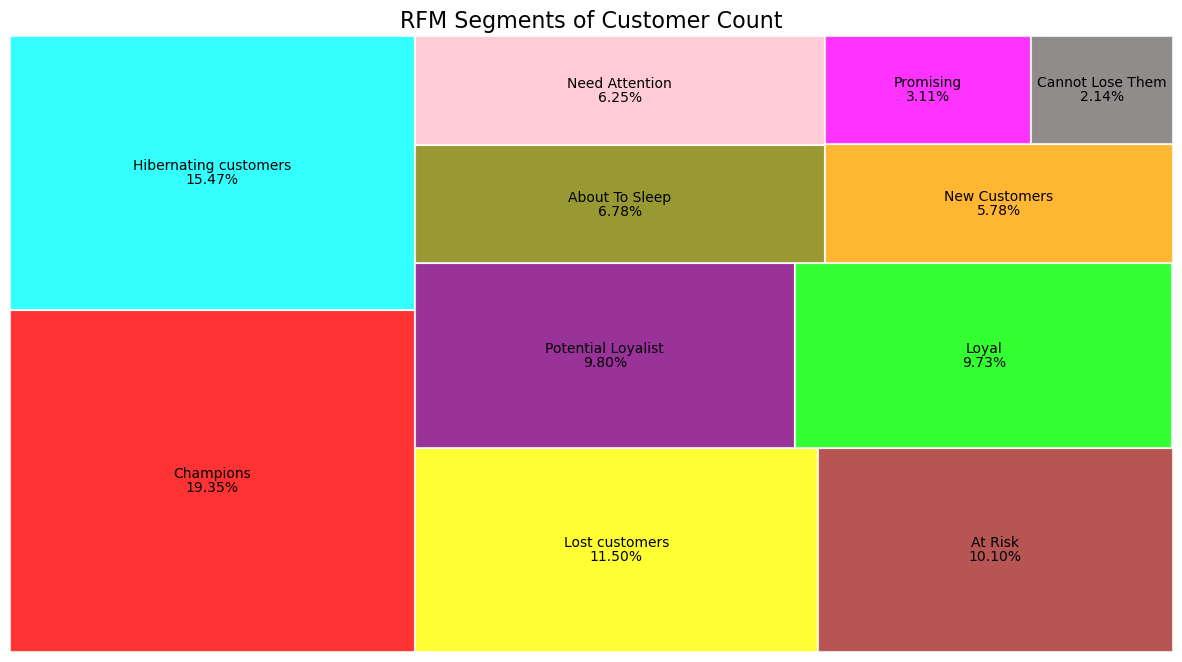

In [44]:
# Plot: RFM Segments of Customer Count:

colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=joined_final['CustCount'], 
              label=joined_final['Segment'],
              value=[f'{x*100:.2f}%' for x in joined_final['CountShare']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white") 
             )
plt.title('RFM Segments of Customer Count', fontsize=16) 
plt.axis('off')
plt.show()

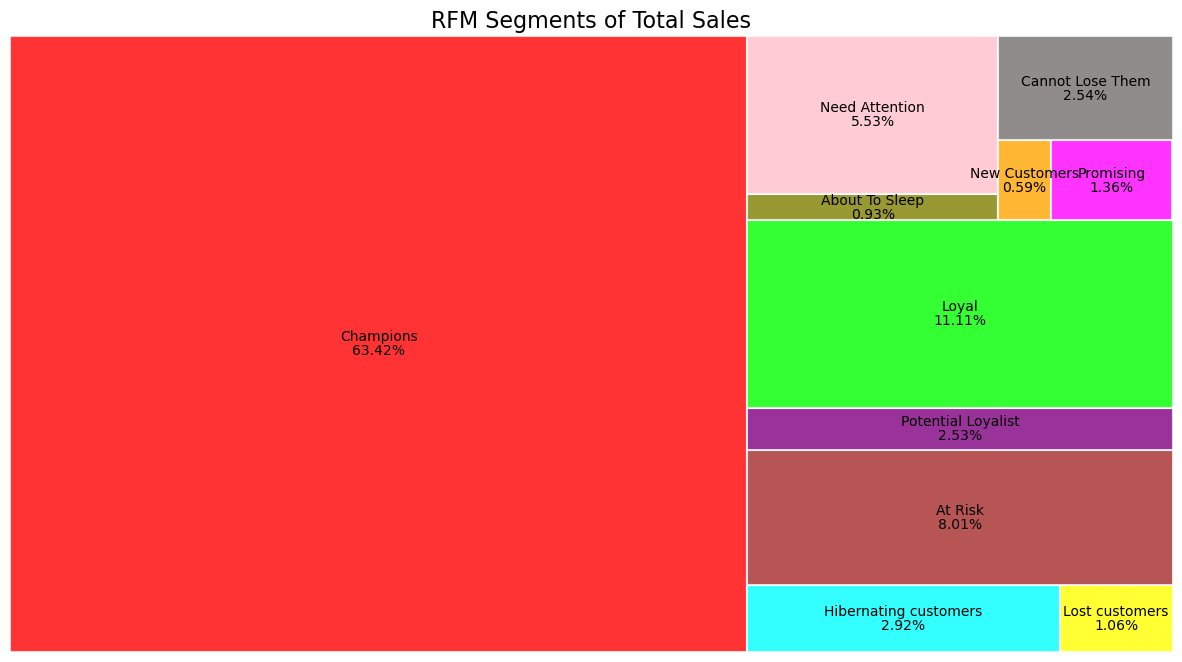

In [45]:
# Plot: RFM Segments of Total Sales:

colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=joined_final['MonetaryShare'], 
              label=joined_final['Segment'],
              value=[f'{x*100:.2f}%' for x in joined_final['MonetaryShare']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

C:\Users\Nuong\AppData\Local\Temp\ipykernel_11240\633033321.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(joined[col]) # joined là tên bảng cuối cùng, distplot = đoán: distribution plot: tìm có () datacamp ko?
C:\Users\Nuong\AppData\Local\Temp\ipykernel_11240\633033321.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

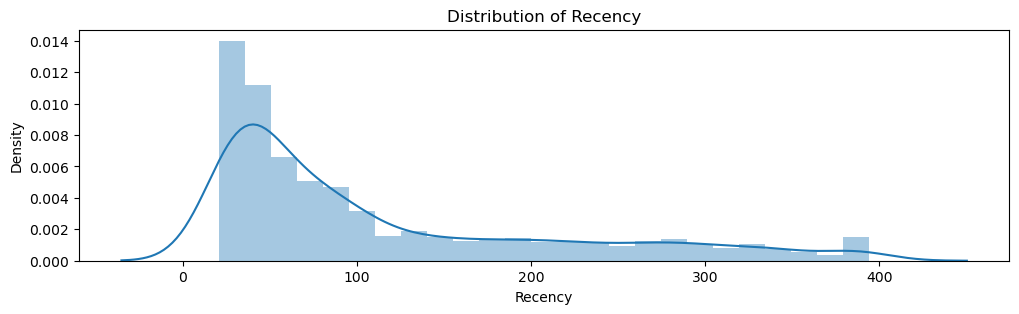

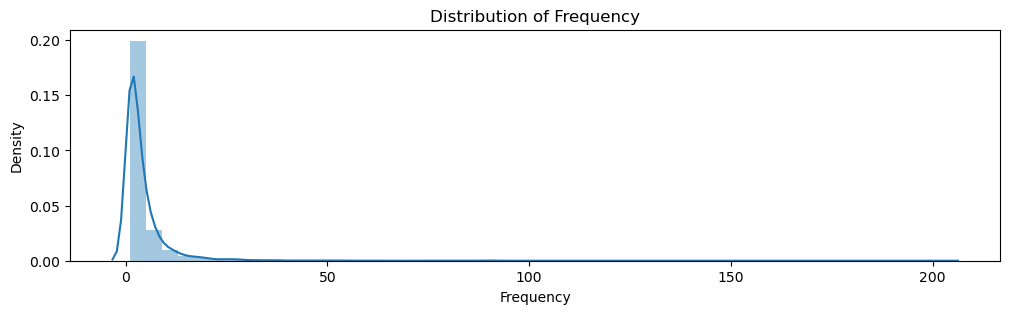

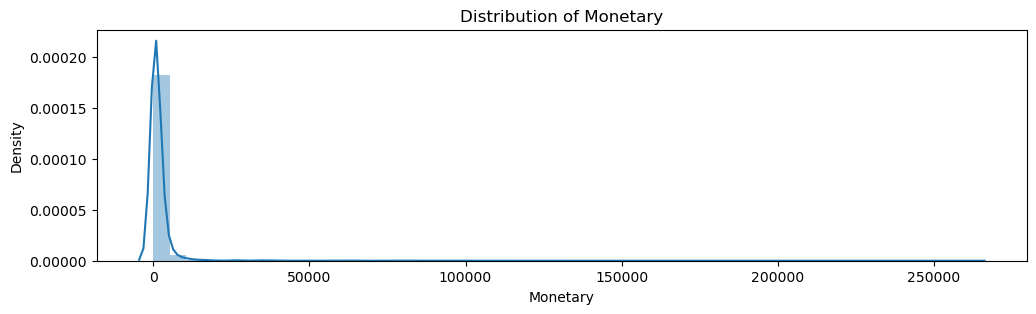

In [48]:
# show distribution of each variable of the model:

import matplotlib.pyplot as plt
import seaborn as sns

colnames = ['Recency', 'Frequency', 'Monetary'] # 1 list gồm tên các cột

for col in colnames: # cho biến chạy trong các cột
    fig, ax = plt.subplots(figsize=(12,3)) # figsize là gì figure size à?
    sns.distplot(joined[col]) # joined là tên bảng cuối cùng, distplot = distribution plot.
    ax.set_title('Distribution of %s' % col)
plt.show()